# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kingston
Processing Record 2 of Set 1 | talnakh
Processing Record 3 of Set 1 | brookings
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | san juan de miraflores
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | pokachi
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | vila franca do campo
Processing Record 10 of Set 1 | arkhangel'sk
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | aglona
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | raja
Processing Record 16 of Set 1 | sovetskaya gavan'
Processing Record 17 of Set 1 | nadi
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | flying fish cove
Processing Record 21 of Set 1 | ust'-ilimsk
Processing Record 22 of Set 1 |

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kingston,17.9970,-76.7936,303.84,81,75,8.75,JM,1691621125
1,talnakh,69.4865,88.3972,286.60,67,100,2.94,RU,1691621286
2,brookings,44.3114,-96.7984,301.03,58,40,4.63,US,1691621286
3,port-aux-francais,-49.3500,70.2167,276.07,78,95,12.27,TF,1691621286
4,san juan de miraflores,-12.1629,-76.9635,293.44,80,29,4.19,PE,1691621286


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,303.84,81,75,8.75,JM,1691621125
1,talnakh,69.4865,88.3972,286.60,67,100,2.94,RU,1691621286
2,brookings,44.3114,-96.7984,301.03,58,40,4.63,US,1691621286
3,port-aux-francais,-49.3500,70.2167,276.07,78,95,12.27,TF,1691621286
4,san juan de miraflores,-12.1629,-76.9635,293.44,80,29,4.19,PE,1691621286


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

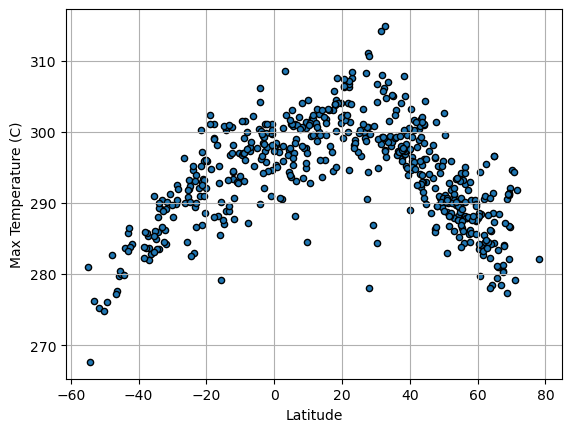

In [17]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

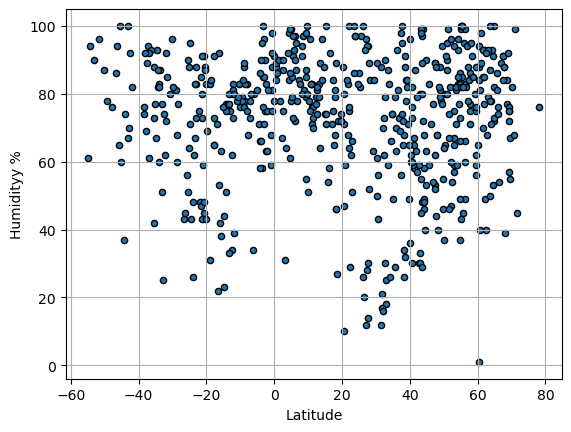

In [18]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidityy %")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

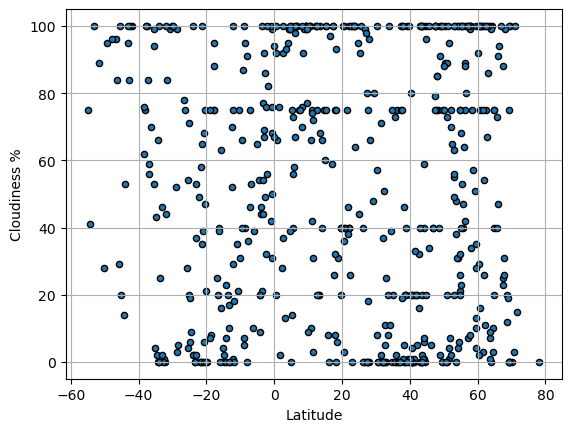

In [19]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', edgecolor='black')


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

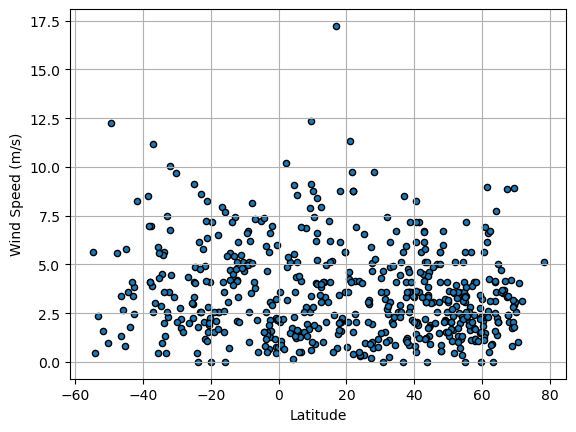

In [20]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def lin_regress(x_values ,y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values*slope + intercept 
    line_eq = f"y ={x_values}x + {intercept}" 
    plt.plot(x_values, regress_values, "r")

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
city_data_df = city_data_df.astype({'Lat':'float'})
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kingston,17.9970,-76.7936,303.84,81,75,8.75,JM,1691621125
1,talnakh,69.4865,88.3972,286.60,67,100,2.94,RU,1691621286
2,brookings,44.3114,-96.7984,301.03,58,40,4.63,US,1691621286
5,bethel,41.3712,-73.4140,301.75,58,0,3.60,US,1691621286
6,pokachi,61.7198,75.3683,282.75,85,100,6.62,RU,1691621286


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,276.07,78,95,12.27,TF,1691621286
4,san juan de miraflores,-12.1629,-76.9635,293.44,80,29,4.19,PE,1691621286
7,vila velha,-20.3297,-40.2925,296.12,88,75,4.12,BR,1691621287
12,puerto natales,-51.7236,-72.4875,275.28,96,89,1.61,CL,1691621127
13,ushuaia,-54.8000,-68.3000,280.96,61,75,5.66,AR,1691621081


###  Temperature vs. Latitude Linear Regression Plot

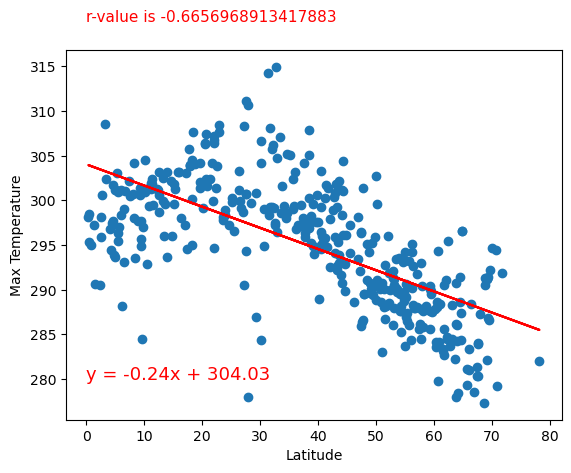

In [37]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#graphing scatter plot and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.text(0,320, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(0,280, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

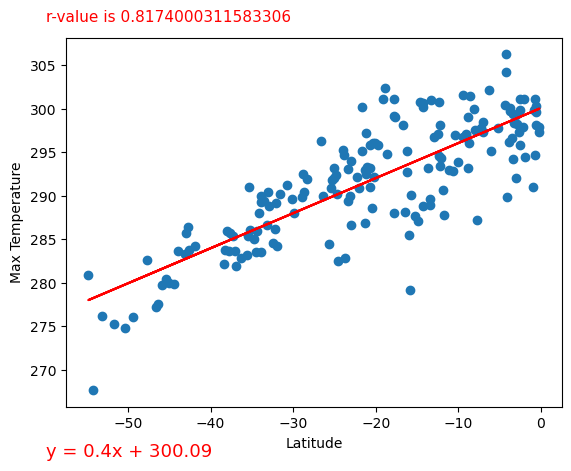

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")


#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.text(-60,310, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(-60,260, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

**Discussion about the linear relationship: There is a strong correataion between latitude and max temperatures. The closer a location is to the equator the higher it's max temperature is.

### Humidity vs. Latitude Linear Regression Plot

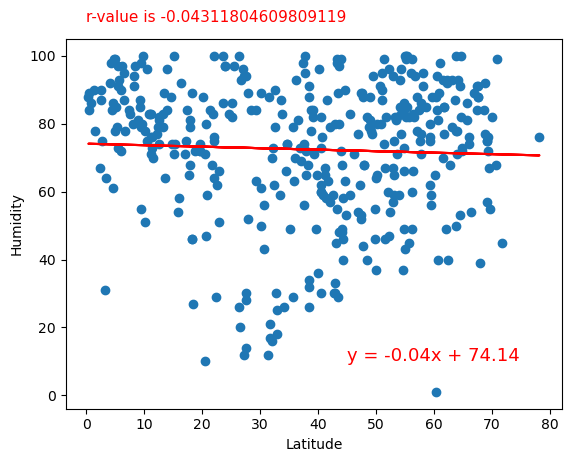

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(0,110, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(45,10, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

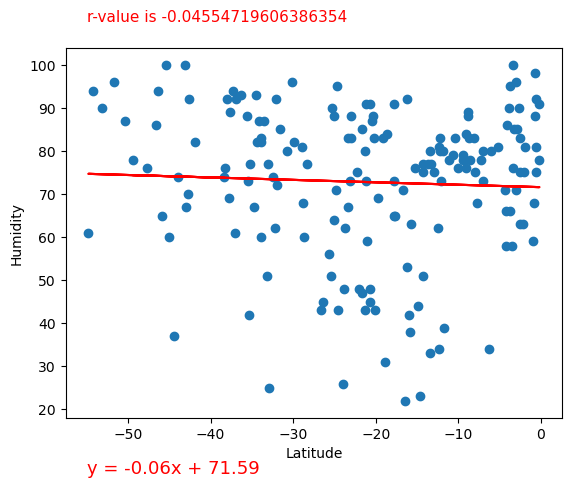

In [49]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-55,110, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(-55,5, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

**Discussion about the linear relationship:There is not a strong correlation.

### Cloudiness vs. Latitude Linear Regression Plot

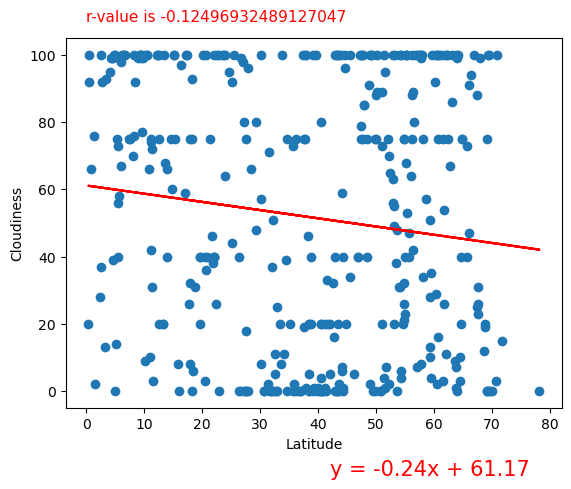

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(0,110, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(42,-25, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=15, color='red')
plt.show()

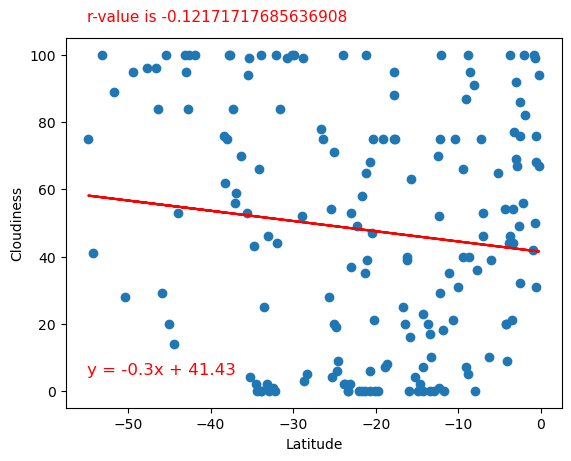

In [57]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-55,110, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(-55,5, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=12, color='red')
plt.show()

**Discussion about the linear relationship: The correlation is weak. 

### Wind Speed vs. Latitude Linear Regression Plot

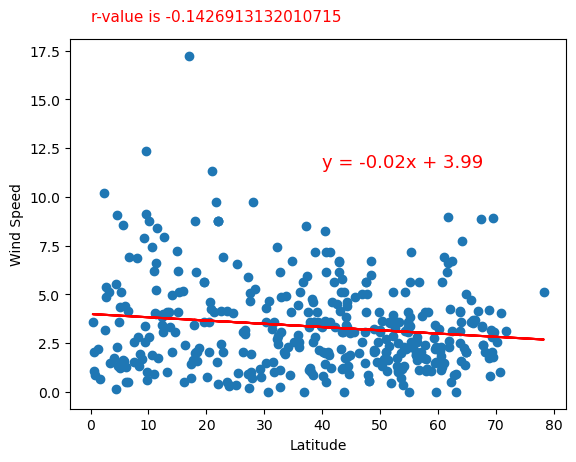

In [61]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(0,19, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(40,11.5, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

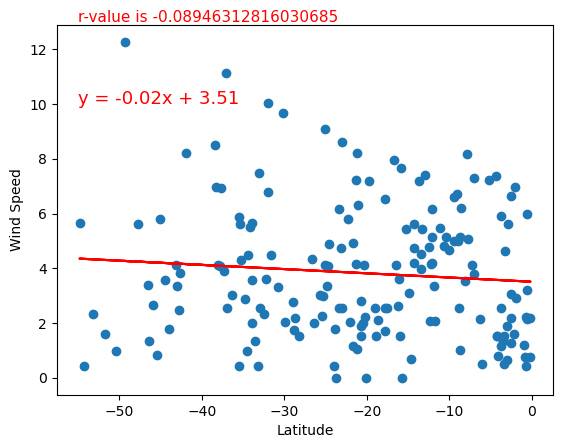

In [65]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, "r")

#Creating scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-55,13, f"r-value is {rvalue}", fontsize=11, color="red")
plt.text(-55,10, f"y = {round(slope,2)}x + {round(intercept,2)}", fontsize=13, color='red')
plt.show()

**Discussion about the linear relationship:There is not a strong correlation.